# Team 1 - Chocolate Bar

![](https://img.newatlas.com/cocoa-tree-domestication-chocolate-1.jpg?auto=format%2Ccompress&ch=Width%2CDPR&fit=crop&h=347&q=60&rect=0%2C18%2C1620%2C911&w=616&s=2c0f902d21b734d77c99fd13171fb979)

_For more information about the dataset, read [here](https://www.kaggle.com/rtatman/chocolate-bar-ratings)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- There are lots of poorly labeled data in `Broad Bean Origin` column.
- There are some rows in `Broad Bean Origin` with multiple values, those values will create errors in our data. 
- How can we get rid of the `%` sign in `Cocoa Percent` column?
- And more...

## Define problem
Bài toán đặt ra yêu cầu phân tích các thông số của chocolate để xác định được những yêu tố nào, ảnh hưởng đến chất lượng của chocolate.

---
Một số câu hỏi có thể đặt ra:

1. Đâu là quốc gia có điểm đánh giá cao nhất?
2.   Công ty nào làm ra thanh chocolate được đánh giá cao?




### Information about dataset:


*   Company  (Maker-if known): Tên cty làm ra thanh chocolate.
*   Specific Bean Origin or Bar Name: địa điểm cụ thể sản xuất.
*   REF:
*  Review Date: Năm đánh giá.
*  Cocoa Percent: tỉ lệ cocoa.
*  Company Location: Trụ sở công ty sản xuất.
*  Rating: điểm đánh giá.
*  Bean Type: loại hạt.
*  Broad Bean Origin: Quốc gia nơi trồng nguyên liệu sản xuất.



## Load data

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving chocolate.csv to chocolate.csv
User uploaded file "chocolate.csv" with length 127723 bytes


In [0]:
# load data
chocolate = pd.read_csv('chocolate.csv')

In [4]:
# explore overview data
chocolate.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [0]:
# rename columns
old_colnames = chocolate.columns
new_colnames = ['company', 'species_bean', 'ref', 'review_year', 'cocoa_percent',
                'company_location', 'rating', 'bean_type', 'country']
chocolate = chocolate.rename(columns=dict(zip(old_colnames, new_colnames)))

## Cleaning data

In [6]:
chocolate.sample(5)

,company,species_bean,ref,review_year,cocoa_percent,company_location,rating,bean_type,country
1741,Willie's Cacao,"Java, Indonesian Black",1109,2013,100%,U.K.,2.25,,Indonesia
308,Cacao Sampaka,"Mahali, Kasai",1908,2016,70%,Spain,3.50,Criollo,Congo
805,hexx,Ecuador,1550,2015,73%,U.S.A.,3.25,,Ecuador
567,Domori,"Ocumare 61, Puertomar",129,2007,75%,Italy,3.25,Criollo (Ocumare 61),Venezuela
413,Chocosol,"Chiapas, Lacandon Jungle, Oaxacom Mtn",682,2011,65%,Canada,3.25,,Mexico


In [0]:
# replace not string to NaN value.
chocolate.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [8]:
# explore null value
chocolate.isnull().sum()

company               0
species_bean          0
ref                   0
review_year           0
cocoa_percent         0
company_location      0
rating                0
bean_type           888
country              74
dtype: int64

In [9]:
chocolate.head()

,company,species_bean,ref,review_year,cocoa_percent,company_location,rating,bean_type,country
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,NaN,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,NaN,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,NaN,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,NaN,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,NaN,Peru


In [10]:
# check datatype -> cocoa_percent: object.
chocolate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
company             1795 non-null object
species_bean        1795 non-null object
ref                 1795 non-null int64
review_year         1795 non-null int64
cocoa_percent       1795 non-null object
company_location    1795 non-null object
rating              1795 non-null float64
bean_type           907 non-null object
country             1721 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [0]:
# preprocessing and change datatype cocoa_percent feature
def preprocessing(percent):
  percent = percent.replace('%', '')
  return float(percent)


chocolate['cocoa_percent'] = chocolate['cocoa_percent'].apply(preprocessing).astype(float)

In [12]:
chocolate.head()

,company,species_bean,ref,review_year,cocoa_percent,company_location,rating,bean_type,country
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,NaN,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,NaN,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,NaN,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,NaN,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,NaN,Peru


In [13]:
# top species_bean:
chocolate['species_bean'].value_counts().head()

Madagascar            57
Peru                  45
Ecuador               42
Dominican Republic    37
Venezuela             21
Name: species_bean, dtype: int64

In [14]:
# 74 rows in country is null, replace it by species:
chocolate['country'] = chocolate['country'].fillna(chocolate['species_bean'])
chocolate['country'].isnull().sum()

0

In [15]:
# top country:
chocolate['country'].value_counts().head()

Venezuela             214
Ecuador               193
Peru                  165
Madagascar            146
Dominican Republic    141
Name: country, dtype: int64

In [16]:
chocolate[chocolate['species_bean'].str.contains(',')]['species_bean'].nunique()

533

## EDA

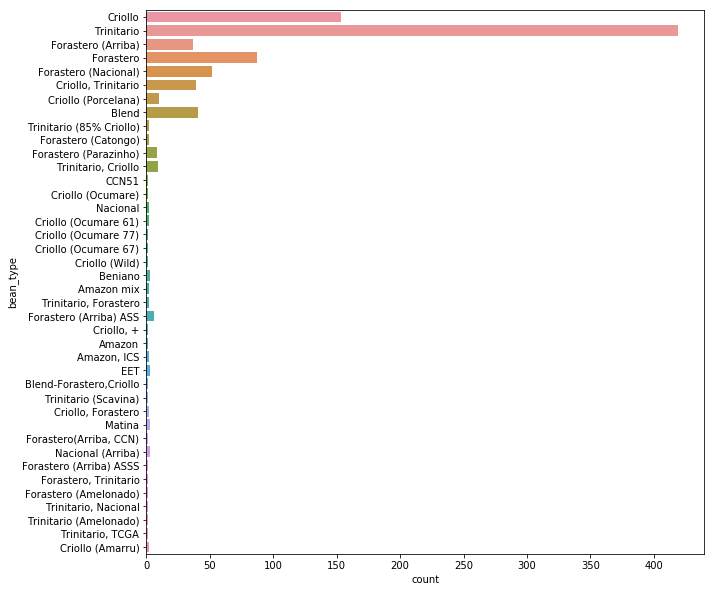

In [17]:
plt.figure(figsize=(10, 10))
sns.countplot(data=chocolate, y='bean_type')

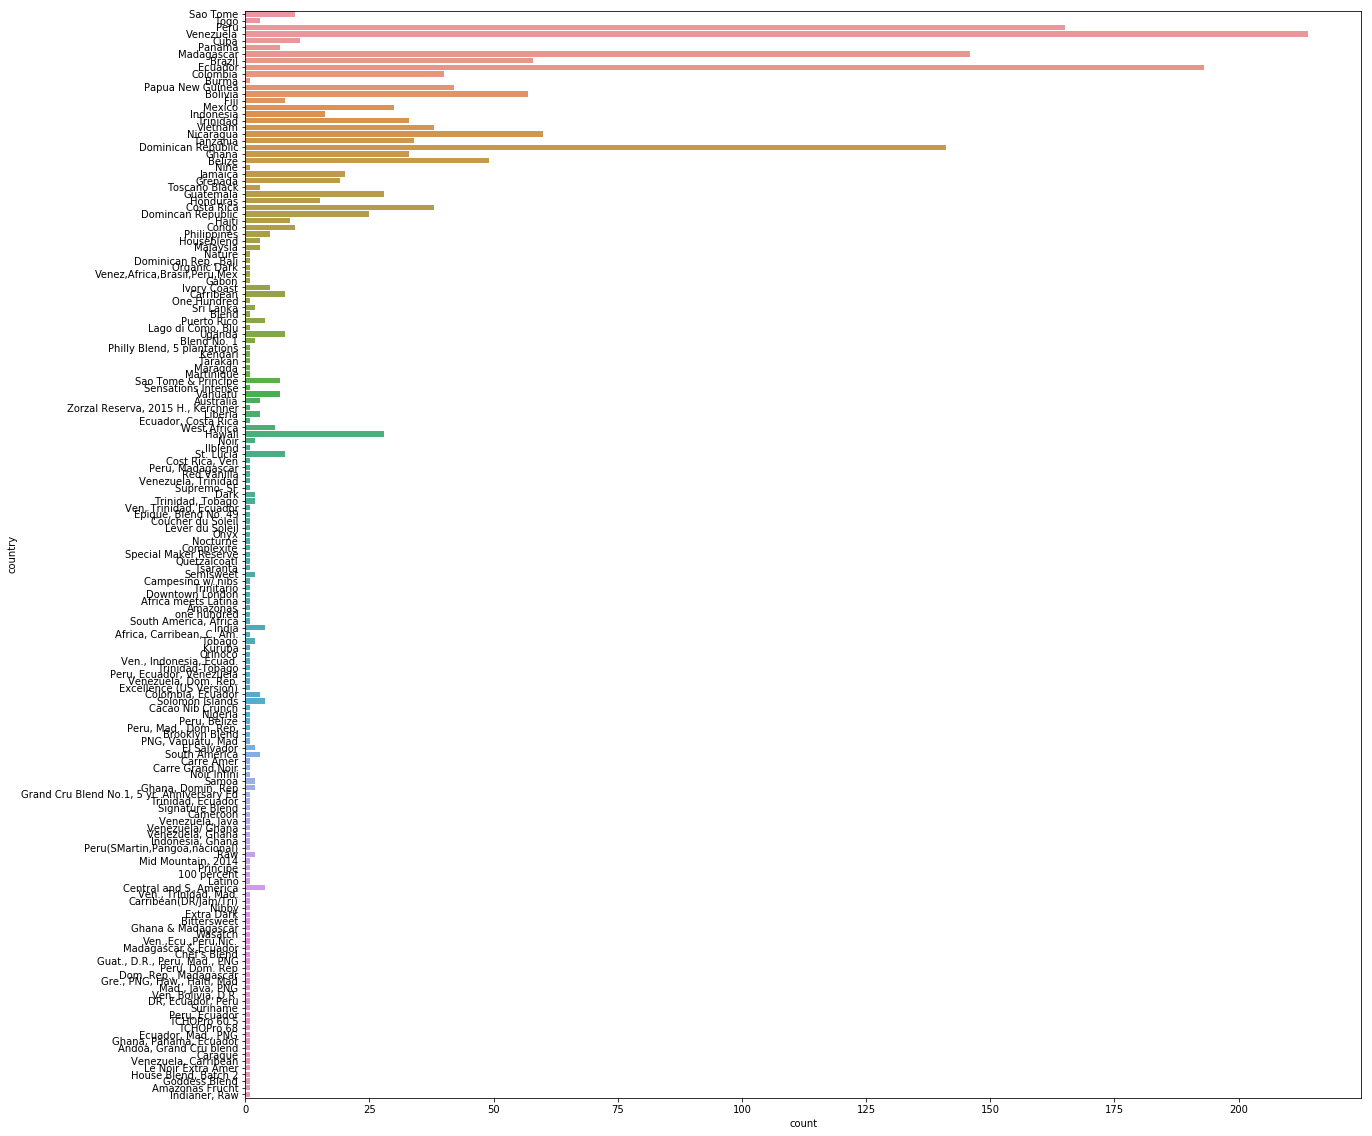

In [18]:
plt.figure(figsize=(20, 20))
sns.countplot(data=chocolate, y='country')

### Which countries produce the highest-rated bars?